# ITS307 Data Analytics                                                   : Spring Semester 2022
# Lecture 12 - Exercise
# K Nearest Neighbours

![image.png](attachment:image.png)

# Import Libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Part A - KNN for Classification

# 1. Data Manipulation with pandas

In [45]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [46]:
idf = pd.DataFrame(data=iris.data, columns=iris.feature_names)
idf

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

# 2. EDA


1. Create correlation matrix and plot it using heatmap
2. Use petel length and petel witdth to check distribution of your data (Scatter plot)

Note: Use seaborn

In [47]:
corr = idf.corr() 
corr

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000

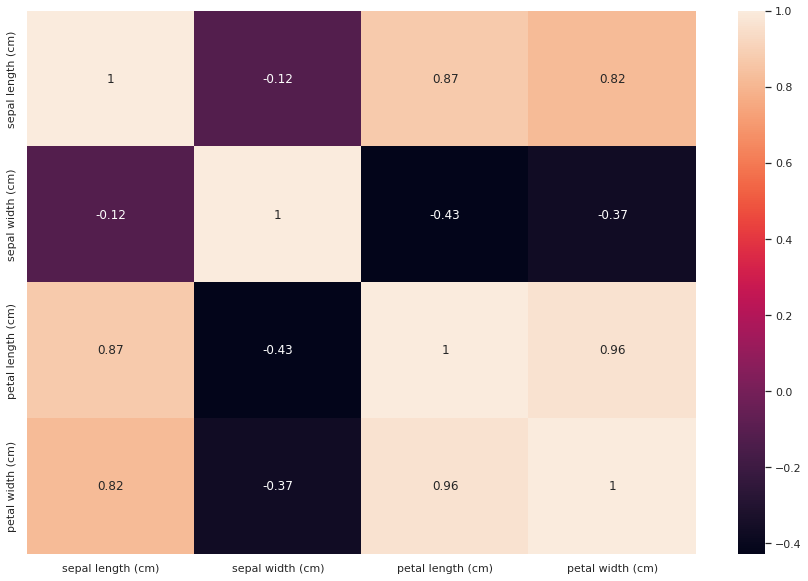

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

# 3. Split data into traning and test set

Note: Make sure that your train and test split will have equal number of data from each class

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=5, shuffle=True, stratify= iris.target)

In [50]:
y_test

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 1])

# 4. Training Model

In [51]:
from sklearn.neighbors import KNeighborsClassifier


In [52]:
knn = KNeighborsClassifier(n_neighbors=5)


In [53]:
knn.fit(x_train, y_train)


KNeighborsClassifier()

# 5. Model Evaluation

1. Check train and test score
2. Display number of truely predicted sample in each class (Confusion matrix)

In [54]:
knn.score(x_train, y_train)

0.9666666666666667

In [55]:
knn.score(x_test, y_test)

0.9666666666666667

In [56]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 1])

In [57]:
y_test

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 1])

In [58]:
# confusion matrix will show which class is misclassified during prediction

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix  # shows that one class 2 is misclassified as 1

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

Text(111.5, 0.5, 'True value')

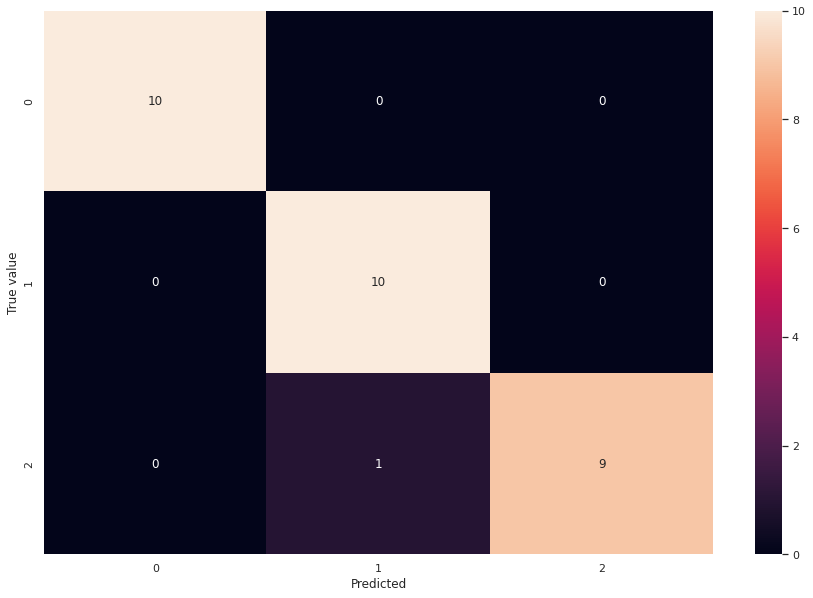

In [59]:
sns.heatmap(data=matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True value")


In [60]:
knn.predict_proba(x_test)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

# 6. Chosing best k

1. Plot train and test score for k values ranging from 1 to 50

In [61]:
trainscore = []
testscore = []
for k in range(1, 50+1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  trainscore.append(knn.score(x_train, y_train))
  testscore.append(knn.score(x_test, y_test))

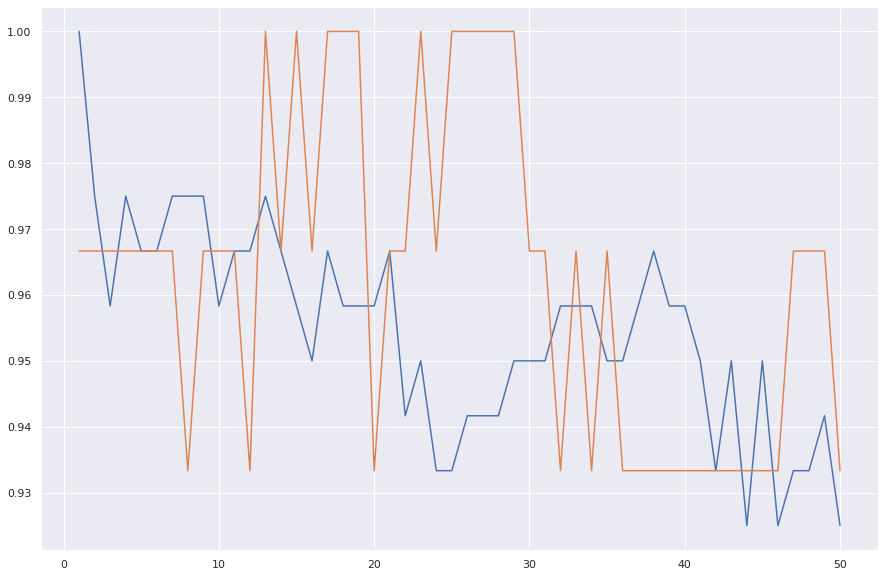

In [71]:
plt.plot(np.arange(1, 50+1), trainscore)
plt.plot(np.arange(1, 50+1), testscore)
plt.show()

# Part B - KNN for Regression

Use boston data to implement KNN in Regression.

Note: Experiment affect of feature scaling.

In [72]:
from sklearn.datasets import load_boston


In [73]:
boston = load_boston()
for keys in boston:
    print(keys)

data
target
feature_names
DESCR
filename
data_module


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [83]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [76]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=5)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linearmodel = LinearRegression()
linearmodel.fit(x_train, y_train)

LinearRegression()

In [84]:
y_pred = linearmodel.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) #( ytest-y_pred)**2
MSE

20.869292183770906

In [85]:
linearmodel.score(x_test, y_test)

0.7334492147453064

In [88]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=6)
knnr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [89]:
y_pred = knnr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) #( ytest-y_pred)**2
MSE

34.27619825708061

In [91]:
knnr.score(x_test, y_test)


0.5622109518369139

In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(boston.data)
x_scaled[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [94]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, boston.target, test_size=0.2, random_state=5)


In [95]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)
MSE = mean_squared_error(ytest, y_pred)
MSE

20.869292183770824

In [97]:
knnrg = KNeighborsRegressor(n_neighbors=6)
knnrg.fit(xtrain, ytrain)
y_pred = knnrg.predict(xtest)

MSE = mean_squared_error(ytest, y_pred)
MSE

16.703899782135075

In [99]:
knnr.score(xtest, ytest)

-0.3001957193555793

In [100]:
knnrg.score(xtest, ytest)


0.7866512402751126

In [101]:
trainscore = []
testscore = []
for k in range(1, 50):
  knnrg = KNeighborsRegressor(n_neighbors=k)
  knnrg.fit(x_train, y_train)
  trainscore.append(knnrg.score(x_train, y_train))
  testscore.append(knnrg.score(x_test, y_test))

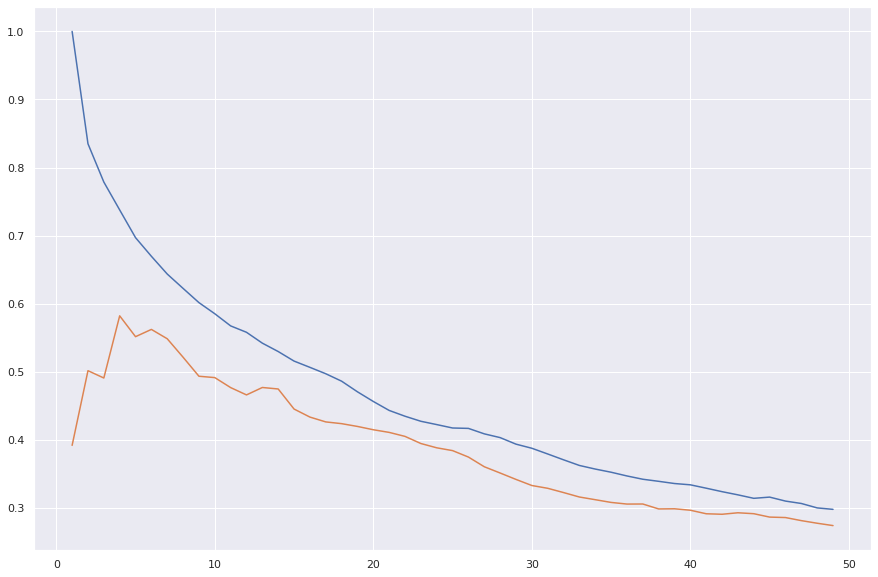

In [102]:
plt.plot(np.arange(1, 50), trainscore)
plt.plot(np.arange(1, 50), testscore)
plt.show()

In [106]:
MSEtr = []
MSEte = []
for k in range(1, 50):
  knnrg = KNeighborsRegressor(n_neighbors=k)
  knnrg.fit(x_train, y_train)
  y_pred_train = knnrg.predict(xtrain)

  y_pred_test = knnrg.predict(xtest)
  MSE1 = mean_squared_error(ytrain, y_pred_train)
  MSEtr.append(MSE1)
  MSE2 = mean_squared_error(ytest, y_pred_test)
  MSEte.append(MSE2)

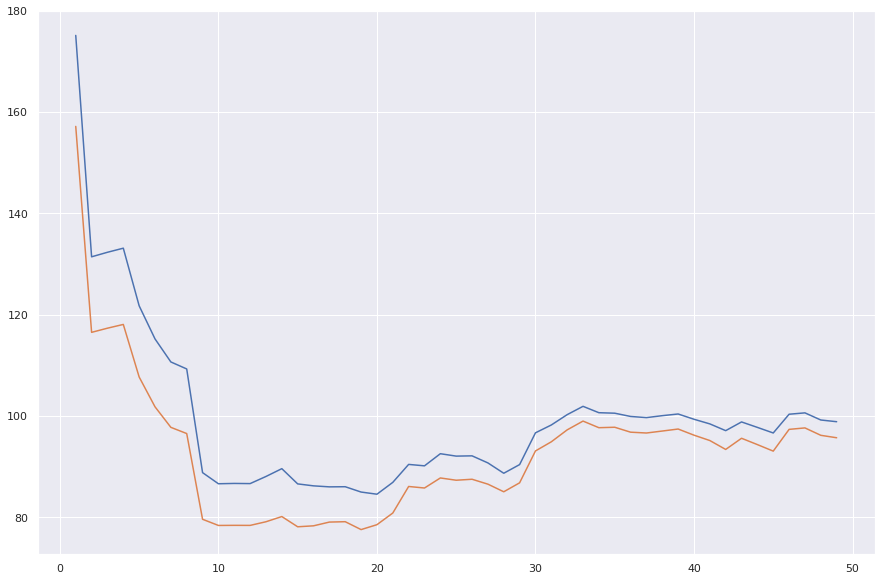

In [108]:
plt.plot(np.arange(1, 50), MSEtr)
plt.plot(np.arange(1, 50), MSEte)
plt.show()

# Conclusion